<a href="https://colab.research.google.com/github/jackqk/sklearn-note/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

# **Hello Logistic**

In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                  n_redundant=0, n_informative=2,
                  n_clusters_per_class=1, flip_y = 0.1,
                  class_sep = 0.5, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)
clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

print('Accuracy of trainning set：{:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of test set:{:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of trainning set：0.81
Accuracy of test set:0.84


# **Fruit Demo**

### 准备数据

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://raw.githubusercontent.com/jackqk/sklearn-note/master/data/fruit_data_with_colors.txt', sep='\t')
fruit_df = df[['height', 'width', 'fruit_label']]
X_fruit = df[['height', 'width']]
y_fruit_apple = (df['fruit_label'] == 1)

X_train, X_test, y_train, y_test = train_test_split(X_fruit, y_fruit_apple, random_state=0)

### 训练

In [0]:
from sklearn.linear_model import LogisticRegression
logic_reg = LogisticRegression(C=100, solver='lbfgs').fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on train set:{:.2f}'.format(logic_reg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set:{:.2f}'.format(logic_reg.score(X_test, y_test)))

print('A fruit with height {} and width {} is predict to be ：{}'.format(6, 8, 'an apple' if logic_reg.predict([[6, 8]])[0] else 'not an apple'))
print('A fruit with height {} and width {} is predict to be ：{}'.format(10, 7, 'an apple' if logic_reg.predict([[10, 7]])[0] else 'not an apple'))

Accuracy of Logistic regression classifier on train set:0.80
Accuracy of Logistic regression classifier on test set:0.73
A fruit with height 6 and width 8 is predict to be ：an apple
A fruit with height 10 and width 7 is predict to be ：not an apple


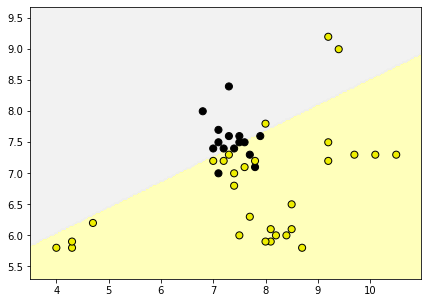

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

numClasses = np.amax(y_train) + 1
color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
cmap_light = ListedColormap(color_list_light[0:numClasses])
cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

plt.figure(figsize=(7, 5))

#这两个参数不知道干嘛的
h = 0.03
k = 0.5

x_min = X_train['height'].min()
x_max = X_train['height'].max()
y_min = X_train['width'].min()
y_max = X_train['width'].max()
x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

P = logic_reg.predict(np.c_[x2.ravel(), y2.ravel()])
P = P.reshape(x2.shape)

plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)
plt.scatter(X_train['height'], X_train['width'], c=y_train, cmap=cmap_bold, s=50, edgecolor='Black')

### 多个正则化之间的比较

In [47]:
#比较下哪个效果最好
for this_C in [0.1, 1, 100]:
  clf = LogisticRegression(solver='lbfgs', C=this_C).fit(X_train, y_train)
  print('C={:.1f}'.format(this_C))
  print('Accuracy of trainning set：{:.2f}'.format(clf.score(X_train, y_train)))
  print('Accuracy of test set:{:.2f}\n'.format(clf.score(X_test, y_test)))

C=0.1
Accuracy of trainning set：0.80
Accuracy of test set:0.80

C=1.0
Accuracy of trainning set：0.81
Accuracy of test set:0.84

C=100.0
Accuracy of trainning set：0.81
Accuracy of test set:0.84

